# Машинное обучение. Введение
При рассмотрении ИИ, было установлено два основополагающих подхода (нисходящий и восходящий), на их стыке находится машинное обучение, которое работает непосредственно с данными, и устанавливает между ними взаимосвязи.

Машинное обучение извлекает знания из данных. МО может работать не только с нейронными сетями, но и с более простыми алгоритмами.

Ссылки: [Весь код из примеров ниже](https://github.com/shwars/ai_course/blob/main/02-MLExpress/ExpressML.ipynb)

## Машинное обучение и Программирование

МО часто сравнивают с классическим программированием, поскольку процесс написания и построения программы чем-то похожи, только на выходе в случае программирования мы получаем какой-то абстрактный результат, а в случае МО, мы получаем программу.

![Сравнение МО и программирования](https://i.imgur.com/ZEksKMx.png)


## Машинное обучение.
На картинке ниже представлены компоненты, из которых строится программа МО.

![Процесс создания программы МО](https://i.imgur.com/hFeUOBD.png)

Полученная программа - модель проверяется на качество обучения. Для этого используется тестовый датасет (важно, чтобы он не был включён в обучающий датасет).

![Проверка модели](https://i.imgur.com/Jl8iwDV.png)

## Машинное обучение. Инструменты статистики.

Перед написанием модели, зачастую приходится проанализировать датасет, для этого можно использовать различные инструменты, от Python, до Excel.

Например, в Excel для этого очень удобно использовать сводные таблицы, в Python - numpy, pandas.

## Машинное обучение. Задачи

Обучение с учителем. Существует обучающая выборка, в которой есть набор параметров и ответ на интересующий нас запрос.
Примеры:
- Регрессия (нахождение значения на основе параметров)
- Классификация (определение класса объекта по параметрам)


Обучение без учителя. Обучающей выборки не существует, есть лишь представление об обработке тех или иных параметров, после чего модель при поступлении данных начнётся постепенно обучаться на них, создавая и совершенствуя правила обработки.

Примеры: 
- Кластеризация (группировка похожих объектов по определённым параметрам)
- Обучение с подкреплением (обучение на самом себе, отбрасывая неудачные попытки). Пример - обучение игре в шахматы.

![Задачи МО](https://i.imgur.com/0HyDL74.png)

## Машинное обучение. Пример предсказания стоимости билета на поезд.

Рассмотрим пример машинного обучения задачи регрессии. Посмотрим, что используется в нашей обучающей выборке.

X - признаки, от которых зависит искомое значение (параметры). В нашем случае расстояние, класс билета, время в пути.
Y - искомое значение - то, что мы непосредственно хотим научиться прогнозировать. В нашем случае это стоимость билета.

Признаки бывают числовыми и категориальными (те, что выражены словами).

![Описание обучающей выборки](https://i.imgur.com/ehkoV9Q.png)

Для числового признака (расстояния) можно построить график зависимости цены от расстояния. После чего провести апроксимирующую прямую (которая усредняет значения набора точек). После чего, для прогноза цены билета с любым расстоянием, можно провести линию к этой прямой и оттуда к оси цены и получить прогноз.

![График одного числового признака](https://i.imgur.com/ulAAqVj.png)

## Машинное обучение. Математика регрессии. Простейший случай

Наша модель имеет линейную формулу (aX + b).
Ошибка - расстояние (разница) между фактическим значением искомого параметра и значением, полученным с помощью апроксимации. Ошибка L(a, b) - сумма всех расстояний.

Задача - подбор параметров a, b таких, что ошибка будет минимальной

![Пример регрессии и ошибки на графике](https://i.imgur.com/3mCK56b.png)

## Метод наименьших квадратов.

Для вычисления ошибки зачастую используется метод наименьших квадратов, где высчитываются все квадраты отклонений, после чего берётся 0 производной и вычисляются параметры a, b.

![Метод наименьших квадратов 1](https://i.imgur.com/KXjPyMU.png)

Вычисление параметров имеет следующие формулы для одномерного и многомерного случаев:

![Метод наименьших квадратов 2](https://i.imgur.com/s2n8E9E.png)

## Машинное обучение. Практика на Python. Предсказание стоимости билета на поезд.

Будем использовать датасет с информацией о билетах в Европе. В датасете присутствует расстояние между городами, точки отправки и назначения, тип вагона, тип билета, время в пути, кол-во пассажиров и т.д. На его примере разберём, как строится модель для машинного обучения и прогнозирования цены билета от нескольких факторов.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

import sklearn.model_selection
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.linear_model
import sklearn.compose
import sklearn.tree
import sklearn.datasets

In [2]:
df = pd.read_csv("./data/renfe-rail-sample.zip", compression='zip')

Разобьём датасет на обучающую и тестовую выборку. `train_size` отвечает за процент данных для обучающей выборки от всего датасета.

In [3]:
df_train, df_test = sk.model_selection.train_test_split(df, train_size=0.8)

Начнём прогнозирование одного параметра (расстояния). Изобразим график:

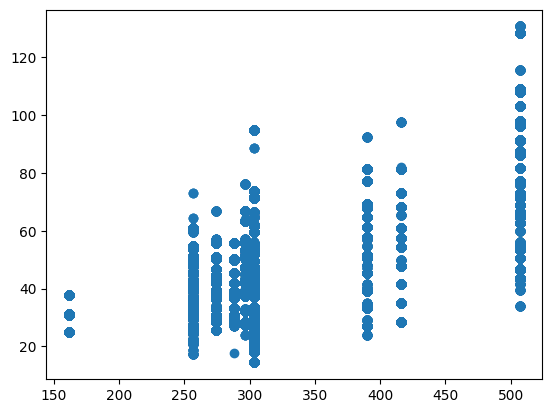

In [4]:
X = df_train["geodistance"]
Y = df_train["price"]

plt.scatter(X, Y)
plt.show()

Для нахождения коэффицентов `a`, `b` используем метод наименьших квадратов (см. выше).

In [5]:
n = len(X)
a = (X.sum()*Y.sum()-n*(X*Y).sum())/(X.sum()*X.sum()-n*(X*X).sum())
b = (Y.sum()*(X*X).sum()-X.sum()*(X*Y).sum())/(X*X).sum()/(n-X.sum())
print(f"a={a}, b={b}")

a=0.1511793965741659, b=-0.0006902390437831698


Построение апроксимирующей прямой для одного называется линейной регрессией. Для большего кол-ва параметров, используются многомерные апроксимирующие плоскости (их вычисление так же было приведено выше).

Построим её на предыдущем графике:

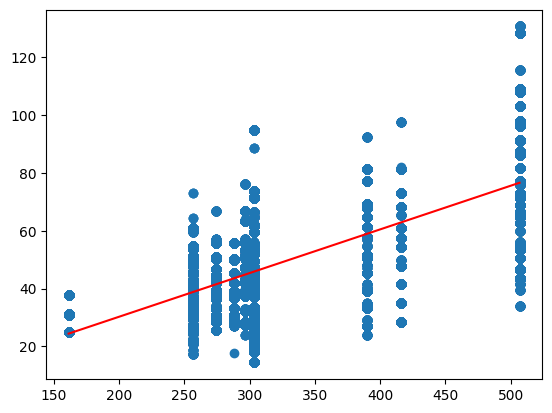

In [6]:
plt.scatter(X,Y)
lX = [X.min(),X.max()]
lY = [a*x+b for x in lX]
plt.plot(lX,lY,c='red')
plt.show()

## Подсчёт ошибки.

Будем высчитывать ошибку на тестовой выборке. Для этого существуют следующие алгоритмы:
- Среднеквадратичное отклонение (MSE)
- Средняя (абсолютная) ошибка (MAE)
- Относительная средняя ошибка. Показатель ошибки в процентах относительно среднего значения целевой величины.

![Ошибки на тестовой выборке](https://i.imgur.com/EzeEKJm.png)

In [7]:
X_t, Y_t = df_test["geodistance"], df_test["price"]

def MSE(x,y):
    return np.mean(np.square(x-y)) 

def MAE(x,y):
    return np.mean(np.abs(x-y))

print(f"MSE={np.sqrt(MSE(a*X_t+b,Y_t))}, MAE={MAE(a*X_t+b,Y_t)}, MAE(%)={MAE(a*X_t+b,Y_t)/Y_t.mean()}")

MSE=16.316546006214708, MAE=13.623757979934254, MAE(%)=0.2855481048973679


## Оптимизация обучения модели. Метод градиентного спуска

Среднее квадратичное отлично работает для малых и средних размерностей. Но если размерность большая или функция ошибки является сложной, то прибегают к оптмизационным численным способам нахождения параметров `a`, `b`.

Численный метод зависит от обучающего датасета и некого параметра Тэта. После чего вычисляем предсказание, зависящее от параметров и Тэта, вычисляем ошибку и подбираем Тэта так, чтобы минимизировать ошибку.

По сути, это численная задача нахождения экстремума функции ошибки (минимума), у этой задачи есть множество алгоритмов решений, рассмотрим метод градиентного спуска.

![Минимизация ошибки](https://i.imgur.com/siDIhNj.png)

![Метод градиентного спуска](https://i.imgur.com/zZIztIr.png)

P.S. Значение шага Тета необходимо подбирать опытным путём, пока ошибка не станет уменьшаться.

In [8]:
a,b = np.random.normal(size=2)
eta = 0.000005
for i in range(10):
    print(f"Epoch {i}: MSE={MSE(a*X+b,Y)}")
    # print(f"a={a},b={b}")
    a,b = a-eta*((a*X+b-Y)*X).mean(), b-eta*(a*X+b-Y).mean()

Epoch 0: MSE=364910.1781544729
Epoch 1: MSE=89543.98664645028
Epoch 2: MSE=22122.626532038594
Epoch 3: MSE=5615.008894385839
Epoch 4: MSE=1573.2417210950957
Epoch 5: MSE=583.645145374762
Epoch 6: MSE=341.3497973809746
Epoch 7: MSE=282.0255865202662
Epoch 8: MSE=267.5004951867942
Epoch 9: MSE=263.94413445128515


Выведем прямую из коэффицентов, полученных методом градиентного спуска.

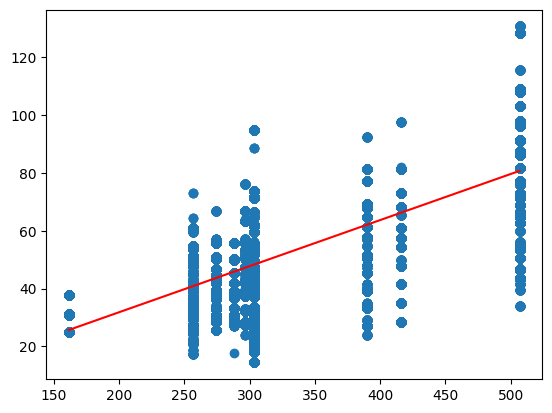

In [9]:
plt.scatter(X,Y)
lX = [X.min(),X.max()]
lY = [a*x+b for x in lX]
plt.plot(lX,lY,c='red')
plt.show()

Добавим ещё численных параметров.

Используем векторное уможение, в качестве коэффицента a используется массив коэффицентов.

In [10]:
X = df_train[["geodistance","duration","departure_hour"]]
X_t = df_test[["geodistance","duration","departure_hour"]]

*a, b = np.random.normal(size=4)
a = np.array(a)
eta = 0.000005
for i in range(10):
    print(f"Epoch {i}: MSE={MSE(X@a+b,Y)}")
    # print(f"a={a},b={b}")
    a,b = a-eta*((X@a+b-Y)*X.T).mean(axis=1), b-eta*(X@a+b-Y).mean()

Epoch 0: MSE=402.3253921455048
Epoch 1: MSE=330.31172071827183
Epoch 2: MSE=312.7249231927709
Epoch 3: MSE=308.4199931851412
Epoch 4: MSE=307.3562601454404
Epoch 5: MSE=307.0834859033533
Epoch 6: MSE=307.0037355821443
Epoch 7: MSE=306.9710943376404
Epoch 8: MSE=306.94995437449086
Epoch 9: MSE=306.93162627295686


In [11]:
a, b

(geodistance       0.181282
 duration          0.439180
 departure_hour   -0.676583
 dtype: float64,
 -0.20520480752062495)

Средняя абсолютная ошибка:

In [12]:
np.mean(np.abs(X_t@a + b - Y_t))

14.839148434794359

## Машинное обучение. Признаки.

Рассмотрим, какие признаки бывают:

Числовые:
- Непрерывные (возраст, рост). С таким типом мы только что работали.
- Дискретные (количество детей)

Категориальные:
- Порядковые (оценка). Такой признак можно интерпретировать, как числовой, совершив подмену признака на цифру по возрастанию.
- Номинальные (цвет, класс)

Преобразование признаков к числовым:
![Преоборазование признаков к числовым](https://i.imgur.com/6Wy7T0H.png)

One-Hot Encoding - запись признака вектором значений, в котором один из элементов единица, а все остальные - нули. 4
Например, имеем красный цвет, всего дано 6 цветов, получим вектор, из 5 нулей и единичкой в индексе, который отвечает за красный цвет.

P.s. Пример с цветов является показательным, но не совсем верным, для цвета чаще всего используется приведение к RGB формату.


Бывают задачи, когда необходимо перейти от числовых признаков к категориальным. В таком случае непрерывные величины подвергаются дискретизации - определённые интервалы значений формируют группы (категории), их число должно быть конечно. Например, для возраста будут использоваться возрастные категории (молодой, старый и т.д.) 

## Категориальные признаки. Практический пример.

Изучим типы билетов:

In [13]:
df["fare"].value_counts()

fare
Promo +       566980
Flexible      422474
Adulto ida    257222
Name: count, dtype: int64

Отобразим среднюю цену по тарифу:

<Axes: xlabel='fare'>

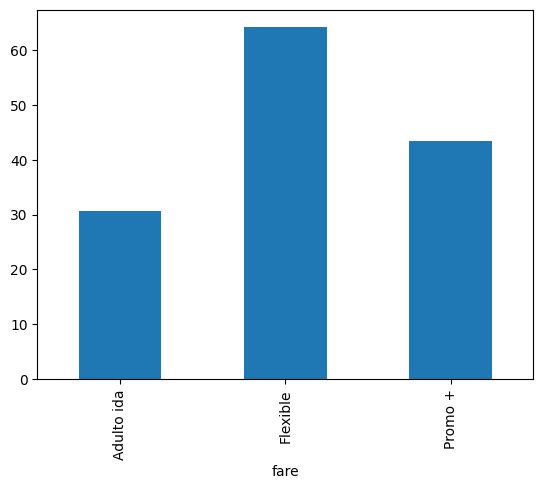

In [14]:
df.groupby("fare").mean(numeric_only=True)['price'].plot(kind='bar')

По информации из графика, можно сказать, что признак можно интерпретировать, как порядковый, так и номинальный, такой параметр можно представить с помощью:
- One-Hot Encoding.
- Label Encoding (приводит уникальные значения к соответсвующим численным значениям). Используется для порядковых.

P.S. (Другие варианты кодирования символьных признаков)[https://habr.com/ru/articles/666234/]

Используем One-Hot Encoding. В Pandas для этого существует специальная функция `get_dummies`.

In [15]:
pd.get_dummies(df['fare'])

,Adulto ida,Flexible,Promo +
0,False,True,False
1,False,False,True
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
1246671,False,False,True
1246672,False,True,False
1246673,False,True,False
1246674,False,True,False


Добавим в таблицу признаков кодирование тарифа с помощью One-Hot Encoding и проведём привычный нам поиск коэффицентов и ошибки:

In [16]:
X = pd.get_dummies(df_train,columns=["fare"])[['geodistance','fare_Adulto ida','fare_Promo +','fare_Flexible']]
X

,geodistance,fare_Adulto ida,fare_Promo +,fare_Flexible
61267,303.573264,False,True,False
1140407,274.364753,False,True,False
574753,296.103026,False,True,False
862735,506.741151,False,True,False
87792,506.741151,False,True,False
...,...,...,...,...
341984,256.506445,False,False,True
355653,389.790764,False,True,False
554107,296.103026,False,True,False
90738,303.573264,False,True,False


In [17]:
*a, b = np.random.normal(size=5)
a = np.array(a)
eta = 0.000005
for i in range(20):
    print(f"Epoch {i}: MSE={MSE(X@a+b,Y)}")
    # print(f"a={a},b={b}")
    a,b = a-eta*((X@a+b-Y)*X.T).mean(axis=1), b-eta*(X@a+b-Y).mean()

Epoch 0: MSE=16756.301692616053
Epoch 1: MSE=4286.782772972521
Epoch 2: MSE=1233.7355387843004
Epoch 3: MSE=486.22472157464074
Epoch 4: MSE=303.2032744568939
Epoch 5: MSE=258.39185368956714
Epoch 6: MSE=247.4198857019511
Epoch 7: MSE=244.73319624941462
Epoch 8: MSE=244.07508098356755
Epoch 9: MSE=243.91364343619472
Epoch 10: MSE=243.87381285746136
Epoch 11: MSE=243.8637566270492
Epoch 12: MSE=243.86099037307872
Epoch 13: MSE=243.86000900397948
Epoch 14: MSE=243.85946464879487
Epoch 15: MSE=243.85902729282057
Epoch 16: MSE=243.85861613588878
Epoch 17: MSE=243.85821139561432
Epoch 18: MSE=243.85780822707488
Epoch 19: MSE=243.85740544443343


Изучив коэффицент `a`, можно узнать, как влияют на цену те или иные признаки. Из-за этого модель называется интерпретируемой.

In [18]:
a

geodistance        0.156694
fare_Adulto ida    0.988906
fare_Promo +      -2.233094
fare_Flexible      0.395629
dtype: object

## Машинное обучение. Scikit learn.

Библиотека SciKit learn является стандартом для работы в машинном обучении, в ней реализовано огромное количество алгоритмов, необходимых для работы с данными, а так же для обучения моделей. Выше был разобран метод градиентного спуска, однако на практике никто не реализует его с нуля или другие классические алгоритмы математики, для этого и создан данный пакет.

Рассмотрим, как работает SciKit Learn:

Для начала выделим численные и категориальные признаки:

In [19]:
numeric = ['geodistance', 'duration', 'departure_hour']
categorial = ['vehicle_type', 'vehicle_class', 'fare']

Обучим модель на численных признаках:

In [20]:
X = df_train[numeric]

model = sk.linear_model.LinearRegression()
model = model.fit(X, Y)

Самый важный метод, который отвечает за обучение - `fit`. Он подбирает наиболее оптимальные коэффиценты, дабы минимизировать ошибку - всё то, что мы делали ручками выше.

В SciKit Learn также реализованы различные методы вычисления ошибок, для примера вычислим точность на тестовой выборке:

In [21]:
X_t = df_test[numeric]
Y_t_pred = model.predict(X_t)

print(f"MSE={sk.metrics.mean_squared_error(Y_t, Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=224.23609854169524, MAE=11.966574552623655, MAE(%)=0.289395440336957


Ошибки в пакете SciKil Learn:
- mean_squared_error - средняя квадратичная ошибка
- mean_absolute_error - средняя абсолютная ошибка
- mean_absolute_percentage_error - абсолютная процентная ошибка

Коэффиценты, вычисленные моделью:
- coef_ - a
- intercept_ - b

In [22]:
print(f"Coefficients={model.coef_} intercept={model.intercept_}")

Coefficients=[ 0.17552256 -3.96977458  0.20040736] intercept=2.070485823052657


Для кодирования признаков можно использовать объекты пакета SciKit Learn, они называются `*Encoder`. 
Для определения значений признаков используется `fit`. 
Для вывода информации о полученных значениях используется `categories_`.
Чтобы закодировать набор данных используется `transform`.

Пример использования энкодера:

In [23]:
ohe = sk.preprocessing.OneHotEncoder()
ohe.fit(df[['fare', 'vehicle_class']])
print(ohe.categories_)
ohe.transform(df[['fare', 'vehicle_class']]).toarray()[:10]

[array(['Adulto ida', 'Flexible', 'Promo +'], dtype=object), array(['Turista', 'Turista Plus', 'Turista con enlace'], dtype=object)]


array([[0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.]])

Чтобы упростить работу с разными типами признаков, можно использовать механизм трансформеров:

In [24]:
transformer = sk.compose.make_column_transformer(
    (sk.preprocessing.OneHotEncoder(), ['fare']), 
    (sk.preprocessing.OneHotEncoder(), ['vehicle_type']),
    (sk.preprocessing.OneHotEncoder(), ['vehicle_class']),
    remainder='passthrough'
)

X = transformer.fit_transform(df_train[numeric + categorial])

X.toarray()[:2]

array([[  0.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ,   0.        ,
          0.        , 303.57326384,   1.73      ,   9.        ],
       [  0.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          1.        , 274.36475269,   8.05      ,   6.        ]])

Таким образом были получены обработанные входные данные, котрые можно использовать для обучения модели:

In [25]:
model = sk.linear_model.LinearRegression()
model.fit(X,Y)
X_t = transformer.transform(df_test[numeric + categorial])
Y_t_pred = model.predict(X_t)

print(f"MSE={sk.metrics.mean_squared_error(Y_t, Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=74.97348836491678, MAE=6.026537585393923, MAE(%)=0.1398968195033901


Теперь, когда для обучения использовались все возможные признаки, точность предсказания кратно увеличилась. Однако остаётся ещё один способ увеличить точность прогнозирования - нормализация данных обучающей выборки.

## Нормализация значений.

Нормализация значений - масштабирование значений всех признаков к единому интервалу, поскольку OneHot Encoding использует интервал от 0 до 1, то имеет смысл подогнать все значения к этому интервалу.

Так же часто используются интервалы [-1; 1] или нормальное распределение с центром в 0.

В Sklearn для этого существуют два вида нормализации (используются внутри трансформера):
- `MinMaxScaler` - преобразует значения к диапазону 0-1 линейным способом
- `MaxAbsScaler` - масштабирует максимальное абсолютное значение до размера единицы
- `StandartScaler` - вычитает среднее и делит на дисперсию (нормально распределение)


Применим их на практике:

In [26]:
transformer = sk.compose.make_column_transformer(
    (sk.preprocessing.StandardScaler(), ['geodistance']),
    (sk.preprocessing.StandardScaler(), ['duration']),
    (sk.preprocessing.StandardScaler(), ['departure_hour']),
    (sk.preprocessing.OneHotEncoder(), ['fare']),
    (sk.preprocessing.OneHotEncoder(), ['vehicle_type']),
    (sk.preprocessing.OneHotEncoder(), ['vehicle_class'])
)
    
X = transformer.fit_transform(df_train[numeric + categorial])
X.toarray()[:2]


array([[ 0.0166545 , -0.48685248, -0.96691618,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ],
       [-0.27717426,  3.4440164 , -1.63130468,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ]])

Обучим модель и проверим ошибку:

In [27]:
model = sk.linear_model.LinearRegression()
model = model.fit(X,Y)
X_t = transformer.transform(df_test[numeric+categorial])
Y_t_pred = model.predict(X_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=74.97229497141748, MAE=6.027414674829677, MAE(%)=0.139914901355967


Результат изменений сильно зависит от входных данных, порой нормализация даёт значительный прирост точности прогнозирования. В данном случае измнений по сути нет.

## Добавление аргументов. Значимость признаков.

Не всегда признаки вносят в результат линейную зависимость, определённые признаки могут влиять на результат больше, чем другие признаки. Поэтому, порой приходится работать с разными зависимостями в жизни (логарифмические, экспоненциальные и т.д.)

Для этого необходимо модерзнизировать входные данные соответствующими преобразованиями над признаками. Часто добавление происходит вручную, когда есть полное понимание структуры данных и признаков. В тех случаях, когда нет чёткого понимания работы и зависимостей разных признаков и их влияния на результат, можно с помощью `PolynomialFeatures` добавить полиномиальные признаки степени 2 (квадраты + попарные перемножения), чтобы проверить, может ли подобное преобразование внести улучшения в точность прогнозирования.

In [28]:
polynomal = sk.preprocessing.PolynomialFeatures()

Xp = polynomal.fit_transform(X)

X.shape, Xp.shape

((997340, 24), (997340, 325))

Выше видно, что благодаря полиномиальному преобразованию из 24 исходных атрибутов, было получено 325, что кратно повышает, как время обучения модели, так и вероятность получения более точного прогноза.

Обучим модель на расширенном наборе признаков:

In [29]:
model.fit(Xp, Y)

Xp_t = polynomal.transform(X_t)
Yp_t_pred = model.predict(Xp_t)

print(f"MSE={sk.metrics.mean_squared_error(Y_t,Yp_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Yp_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Yp_t_pred)}")

MSE=49.951751761242534, MAE=4.616182195978128, MAE(%)=0.10945882101162036


Из примера выше, видно, что точность увеличилась на несколько процентов. Однако, для получения этой точности, мы не только жертвуем временем, но и рискуем получить переобучение.

## Переобучение.

Суть переобучения в том, можно получить почти идеальную точность на обучающей выборке, однако, эта точность будет получена неверна, сама модель не будет апроксимировать нужные нам значения, она будет их подбирать точечно, при этом выдавай совсем другую функцию. Таким образом, на тестовой выборке, будет получена большая вероятность ошибки, которой не было на обучающей выборке.

Переобучение возникает из-за дисбаланса между кол-во примеров в обучающей выборке и количеством параметров (кол-во признаков должно быть сильно меньше, чем кол-во примеров).

Пример переобучения на линейной регрессии:

![Пример переобучения](https://i.imgur.com/oZucYKt.png)

В данном случае, 300 признаков кратно меньше 1КК результатов в обучающей выборке, поэтому проблем с переобучением не возникло.

Поэтому, лучше всего понимать зависимости между данными, дабы не создавать избыточное количество признаков.

## Пайплайны.

Обучение модели состоит из нескольких этапов, которые повторялись много раз - создание трансформера (преобразование, масштабирование данных), применение к признакам различных зависимостей. При чём, на каждом шаге приходилось обучать или адаптировать модели под определённые нужды. Все эти поэтапные шаги можно заменить одним, которые сразу обучит трансформер, масштабирует данные, обучит модель и т.д.

Все эти шаги можно поместить в один конвейер (пайплайн), который можно описать в `sklearn` с помощью `Pipeline`. На выходе получим тот же результат, но более читаемый и лаконичный код.

P.S. PipeLine может объединять в себе любые элементы, которые имеют единый интерфейс обучения (`fit`, `fit_transform`).

In [30]:
pipe = sk.pipeline.Pipeline([
    ('ColumnTransform', transformer),
    ('PolyFeatures', polynomal),
    ('LinearModel', model)
])

pipe.fit(df_train[numeric + categorial], Y)

pipe.score(df_test[numeric + categorial], Y_t)

0.8973924039819148

## Деревья решений.

Многие признаки могут вносить свой вклад в конечное значение вне зависимости от какой-либо функции, а скачкообразно. Например, цена билета в зависимости от тарифа, также актуальным примером является прогрессивный подход к налогооблажению (в зависимости от заработка меняется % налога).

Подобные зависимости фиксируются с помощью условий, для этого используются нелинейные модели - деревья решений. На практике, изменений почти нет, просто теперь для обучения используется `DecisionTreeRegressor`.

Попробуем обучить модель с помощью дерева решений на исходных данных (без оптимизаций).

In [31]:
model = sk.tree.DecisionTreeRegressor()
model = model.fit(X, Y)

Y_t_pred = model.predict(X_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=33.185520388218606, MAE=2.8344390355326303, MAE(%)=0.07083232933918114


# 

Видно, что использование деревья решений сильно повысило точность предсказаний, при чём без использования масштабирования / оптимизации данных.

Для того, чтобы понять, какую же модель лучше использовать обычно используют перебор, в дальнейшем это можно будет понять по опыту и определённым признакам (более глубокое изучение). 

Деревья решений - интерпретируемая модель, то есть можно проследить то, каким образом дерево принимает решения. В данном случае дерево получится достаточно глубоким, поэтому построим дерево с ограниченной глубиной:

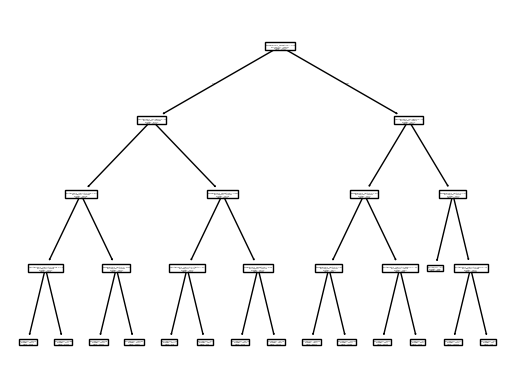

In [32]:
model = sk.tree.DecisionTreeRegressor(max_depth=4)
model = model.fit(X, Y)

z = sk.tree.plot_tree(model, feature_names=transformer.get_feature_names_out())

Для красивого и грамотного отображения имен признаков используется `get_feature_names_out`. 

Изображение выше довольно тяжело рассмотреть (даже при сохранении, как файла), поэтому, для более качественного отображения деревьев можно использовать библиотеку `GraphViz`.

Пример использования:

In [33]:
import graphviz
graphviz.backend.dot_command.DOT_BINARY = 'c:/winapp/conda/Library/bin/graphviz/dot.exe'

def proc_feature_name(x):
    return x.replace('onehotencoder-1__','')\
        .replace('onehotencoder-2__','')\
        .replace('onehotencoder-3__','')\
        .replace('remainder__','')

feature_names = [proc_feature_name(x) for x in transformer.get_feature_names_out()]

graphviz.Source(
    sk.tree.export_graphviz(model,feature_names=feature_names,
    filled=True, rounded=True, special_characters=True)
)

ModuleNotFoundError: No module named 'graphviz'

## Классификация

Типы классификации:

- Бинарная (двоичная) - существуют две категории (являются противоположностями), например спам - не спам.
- Мультиклассовая - необходимо распозанавать один из множества классов, например определение рукописных цифр (от 0 до 9). Такая классификация всегда может быть сведена к бинарной подходом "один против всех". То есть, ноль - не ноль, и так для каждой цифры.


## Постановка задачи классификации

Классификация на примере определения типа опухоли по её возрасту и размеру:

![Классификация](https://i.imgur.com/K3kGk62.png)

## Классификация как регрессия

Регрессия является линейной функцией, однако классификацию нельзя просто подогнать под регресию путём подстановки параметров, ведь у нас может быть ответ только 0 или 1, следовательно линейной функции тут не получится.

В таких ситуациях линейная функция подгоняется так, что она делится пополам на положительные и отрицательные значения в зависимости от класса, после чего к этой линейной функции применяется функция определителя знака и таким образом, получается искомый ответ - класс.

![Классификация через регрессию](https://i.imgur.com/6JOd9IX.png)


Однако с этим подходом есть сложность - при оптимизации, высчитывается градиент, а у такой функции в точке ноль нет производной, поэтому её часто заменяют на более гладкую функцию:

![Гладкая функция регрессии](https://i.imgur.com/s6Dfkbw.png)

Подобная функция приводит любое значение линейной функции в диапазон от 0 до 1, который можно приводить к выбору класса.


Попробуем классификацию на практике. Сгенерируем случайный датасет, для этого используем `datasets.make_classification`. Для наглядности используем размерность 2 и визуализируем набор на плоскости:

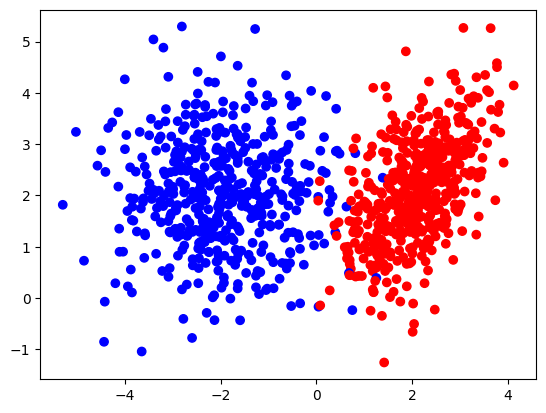

In [34]:
X, Y = sk.datasets.make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0,
    class_sep=2,
    random_state=13,
)

plt.scatter(X[:,0], X[:,1], c=['r' if x else 'b' for x in Y])
plt.show()

В итоге были получены два облака точек, которые довольно хорошо друг от друга отличаются (делятся на классы). Если речь идёт про линейную регрессию, то теперь эти облака точек надо разделить некой идеальной разделяющей прямой. Попробуем это сделать:

Для начала отобразим функцию масштабирования результата (сигмоиду):

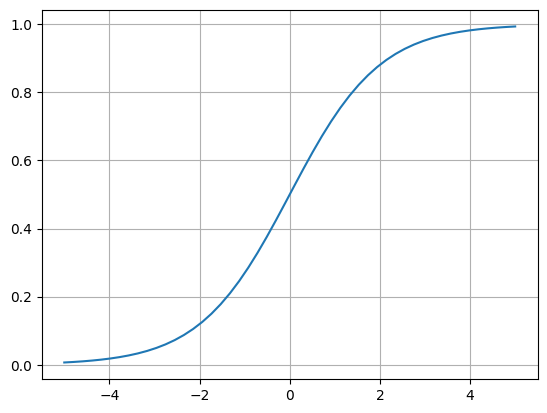

In [35]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5)
plt.plot(x, sigmoid(x))
plt.grid()
plt.show()

Используем метод градиентного спуска. Начнём с ошибки на случайно взятых данных:

In [36]:
W = np.random.normal(size=(2,))
b = np.random.normal(size=(1,))

def mse_loss(W, b):
    return np.average(np.square(sigmoid(np.matmul(X, W) + b) - Y))

mse_loss(W, b)

0.10502081226045024

Далее напишем производную, посчитаем для неё ошибку и начнём спускаться по градиенту. 

P.S. Обычно производная не считается численно, ведь с увеличением количества признаков подобный функционал становится в разы сложнее. Однако для примера будет показан вариант с численным нахождением производной:

In [37]:
def d(f, x: np.ndarray, dx=0.1):
    n = x.shape[0]
    r = np.zeros_like(x)

    for i in range(n):
        dxc = np.eye(n)[i] * dx
        r[i] = (f(x + dxc) - f(x)) / dx
    
    return r

d(lambda x: mse_loss(x, b), W)

array([-0.15252732,  0.17042536])

Выше была посчитана производная по W. Теперь объединим функции и оптимизируем алгоритмом спуска по градиенту:

In [38]:
W = np.random.normal(size=(2,))
b = np.random.normal(size=(1,))

eta = 0.1
n = len(X)
for i in range(100):
    print(f"({W} {b}) -> loss={mse_loss(W,b)}")
    #print(f"dldw={dldw}, dldb={dldb}, W={W}, b={b}")

    dldw = d(lambda x: mse_loss(x,b),W)
    dldb = d(lambda x: mse_loss(W,x),b)
    h = sigmoid(np.matmul(X,W)+b)
    W-=eta*dldw
    b-=eta*dldb

([-1.39325698  1.40967603] [0.19346804]) -> loss=0.6106417511624381
([-1.37328647  1.42388132] [0.2010333]) -> loss=0.6039000679722747
([-1.35395006  1.43736218] [0.20832028]) -> loss=0.5976483492974707
([-1.33523599  1.45014821] [0.21533279]) -> loss=0.591855855508412
([-1.31712728  1.46227211] [0.22207678]) -> loss=0.5864902745150261
([-1.29960332  1.47376814] [0.22855982]) -> loss=0.5815191340306536
([-1.28264114  1.48467098] [0.2347905]) -> loss=0.5769107879272463
([-1.26621649  1.4950149 ] [0.24077806]) -> loss=0.572635059638666
([-1.25030453  1.50483314] [0.24653211]) -> loss=0.5686636235424471
([-1.23488046  1.51415759] [0.25206231]) -> loss=0.5649701950624154
([-1.21991989  1.52301847] [0.25737827]) -> loss=0.5615305870576681
([-1.20539912  1.5314443 ] [0.26248939]) -> loss=0.5583226769694891
([-1.19129534  1.53946179] [0.26740476]) -> loss=0.5553263177069241
([-1.17758672  1.54709591] [0.27213315]) -> loss=0.5525232158953172
([-1.16425248  1.5543699 ] [0.27668295]) -> loss=0.5

Построим разделяющую прямую. Для этого мы приравняем к нулю линейную функцию и посчитаем прямую в координатах:

![Координаты прямой](https://i.imgur.com/7y2OGoi.png)

Построим облака точек вместе с прямой:

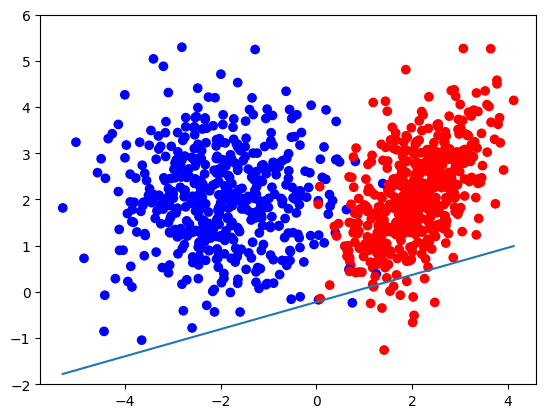

In [39]:
plt.scatter(X[:,0],X[:,1],c=['r' if x else 'b' for x in Y])
xs = X[:,0].min(), X[:,0].max()
plt.plot(xs,[-b/W[1]-x*W[0]/W[1] for x in xs])
plt.ylim([-2,6])
plt.show()

Если запустить процесс оптимизации много раз, то можно заметить, что оптимизация довольна неустойчива, она работает непредсказуемо, порой работает за много шагов, порой вовсе не оптимизирует ошибку и т.д.

Связано это с тем, что ошибка всегда лежит в диапазоне [0; 1], что приводит к малым изменения наклона прямой. Это понятно по преобразующей функции, ведь предсказание 1 и 14 в нашем случае равносильны, они будут ровняться единице, но при оптимизации ошибки это не учитывается. В данном случае среднеквадратичная ошибка не демонстрирует реальную ошибку, следовательно нужно менять подход к определению ошибки.

## Логистическая функция ошибки

По сути, мы оцениваем отдалённость полученного ответа от вероятности нужного класса. Таким образом, мы используем для оценки ошибки логарифмическую функцию, как бы уравнивая экспоненциальную функцию сигмоиды.

![Логистическая функция ошибки](https://i.imgur.com/2CNpsS5.png)

Формулы для логистической функции ошибки в зависимости от типа классификации:

![Формулы для логистической функции ошибки](https://i.imgur.com/vGpsxrP.png)

Применим эти формулы на практике:

In [40]:
W = np.random.normal(size=(2,))
b = np.random.normal(size=(1,))

def loss(W, b):
    h = sigmoid(np.matmul(X,W)+b)
    return (-Y * np.log(h) - (1 - Y) * np.log(1 - h)).mean()

eta = 0.2
n = len(X)
for i in range(100):
    print(f"({W} {b}) -> loss={loss(W,b)}")
    #print(f"dldw={dldw}, dldb={dldb}, W={W}, b={b}")

    h = sigmoid(np.matmul(X,W)+b)
    dldw = np.matmul(X.T,h-Y.T)/n
    dldb = (h-Y.T).mean()
    W-=eta*dldw
    b-=eta*dldb

([-1.20027093 -0.34587015] [0.60028118]) -> loss=2.599628217244739
([-0.82383825 -0.3197243 ] [0.60536021]) -> loss=1.90874183145434
([-0.47268308 -0.29405371] [0.60893325]) -> loss=1.3240550605731105
([-0.16562472 -0.27187199] [0.60999945]) -> loss=0.8947776146480118
([ 0.08026365 -0.25683173] [0.60812334]) -> loss=0.6279881361391856
([ 0.26628907 -0.24959986] [0.6041178]) -> loss=0.47552152193182895
([ 0.40831402 -0.24777124] [0.59915541]) -> loss=0.3852058395952195
([ 0.52104658 -0.24895699] [0.59394306]) -> loss=0.3272392769401375
([ 0.61398927 -0.25174176] [0.5887852]) -> loss=0.28719721488134337
([ 0.69296105 -0.25537429] [0.58379519]) -> loss=0.25790109786804805
([ 0.76163199 -0.2594527 ] [0.57900742]) -> loss=0.2355047598164823
([ 0.82242354 -0.26375437] [0.57442456]) -> loss=0.21779153572297036
([ 0.87700361 -0.26815158] [0.57003698]) -> loss=0.20340164110651524
([ 0.92656484 -0.27256901] [0.56583083]) -> loss=0.1914566701047904
([ 0.97198751 -0.27696142] [0.56179147]) -> loss

При многократном повторении оптимизации, результат не ломается

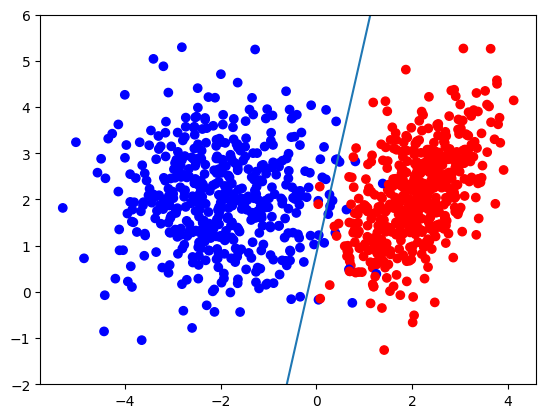

In [41]:
plt.scatter(X[:,0],X[:,1],c=['r' if x else 'b' for x in Y])
xs = X[:,0].min(), X[:,0].max()
plt.plot(xs,[-b/W[1]-x*W[0]/W[1] for x in xs])
plt.ylim([-2,6])
plt.show()

## Классификация в SciKit Learn

Проделаем ту же задачу классификации, но с использованием внутренних средств `sklearn`:

In [42]:
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2)

model = sk.linear_model.LogisticRegression().fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print(f"Accuracy= {sk.metrics.accuracy_score(Y_test, Y_pred)}")

Accuracy= 0.99


В классификации точность определяется не отклонением, а процент правильно предсказанных значений (классов).

Можно не только предсказать класс, но и посмотреть вероятность тех или иных классов для входных признаков. Для этого используется `predict_proba`. Ниже представлена вероятность каждого класса (нулевого, потом первого) для первых 5 записей.

In [43]:
model.predict_proba(X_test[:5])

array([[9.99992028e-01, 7.97186741e-06],
       [9.99548100e-01, 4.51899665e-04],
       [1.68362561e-02, 9.83163744e-01],
       [1.57379736e-02, 9.84262026e-01],
       [1.34363985e-04, 9.99865636e-01]])

Взглянем на разделяющую прямую, полученную с использованием встроенных средства `sklearn`:

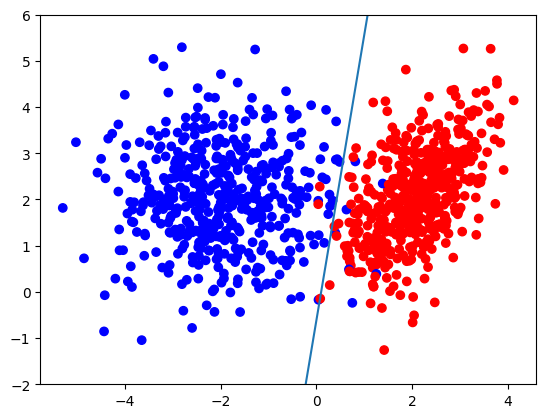

In [44]:
plt.scatter(X[:,0],X[:,1],c=['r' if x else 'b' for x in Y])
xs = X[:,0].min(), X[:,0].max()
b = model.intercept_
W = model.coef_[0]
plt.plot(xs,[-b/W[1]-x*W[0]/W[1] for x in xs])
plt.ylim([-2,6])
plt.show()

Рассмотрим задачу с людьми на Титанике и вероятностью выживания.

In [45]:
df = pd.read_csv("data/titanic.csv")

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis. MO
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal. PQ / Chesterville. ON
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal. PQ / Chesterville. ON
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal. PQ / Chesterville. ON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,Zabour. Miss. Hileni,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,Zabour. Miss. Thamine,female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,Zakarian. Mr. Mapriededer,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,Zakarian. Mr. Ortin,male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


Для начала, поработаем с данными и преобразуем их все к числовым признакам. Начнём с пола:

In [46]:
df['nsex'] = df['sex'].apply(lambda x: 0 if x == 'male' else 1)

Далее, необходимо обработать непригодные примеры, в которых отсуствует значение какого-либо признака.

В этом датасете есть такие примеры с возрастом:

In [ ]:
df['age'].isna().sum()

Эту ситуацию можно решить следующими способами:
- Удалить примеры с пустым возрастом. Рекомендуется делать только в том случае, если количество удалённых строк имеет незначительное количество в сравнении с объёмом всей обучающей выборки
- Убрать признак возраста из модели обучения (нежелательно)
- Заменить пустое значение на какое-то другое (например среднее или предыдущее из таблицы)

Попробуем заменить пустые значения `fillna` на среднее значение:

In [ ]:
df['fage'] = df['age'].fillna(df['age'].mean())

df

Теперь, после подготовки данных к работе, можно выделить признаки для обучения и разбить выборку на тестовую и обучающую:

In [ ]:
features = ['pclass', 'nsex', 'fage', 'sibsp', 'parch']

X = df[features]
Y = df['survived']

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2)

Обучим модель:

In [ ]:
model = sk.linear_model.LogisticRegression().fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print(f"Accuracy= {sk.metrics.accuracy_score(Y_test, Y_pred)}")

Интересно узнать, когда модель делает ошибку, для этого существует матрица ошибок:

In [ ]:
sk.metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)
plt.show()

Эту матрицу довольно легко анализировать, по левой оси - верные данные, по нижней - предсказанные. По пересечениям видно, что довольно много ошибок было допущено для тех, кто по факту выжил. Связано такое плохое прогнозирование с тем, что в обучающей выборке невыживших было кратно больше, что привело к нехватке данных для обучения модели по выжившим.

Другими словами, модель обучалась на НЕСБАЛАНСИРОВАННЫХ данных.

## Точность и матрица ошибок

Разберём подробнее, как работает матрица ошибок и как по ней высчитывается точность предсказания:

![Матрица ошибок и точность](https://i.imgur.com/8Z9juQ6.png)

Ошибка 1-ого рода - False Positive, то есть был предсказан Positive вместо Negative

Ошибка 2-ого рода - False Negative, то есть был предсказан Negative вместо Positive


P.S. Negative и Positive - условные разделения классов на главный и второстепенный

Для определения точности с ошибками такого рода есть определённая метрика, которая ориентируется на главный класс:

![Формулы ошибок](https://i.imgur.com/ahQpWQY.png)

Если же использовать в несбалансированных моделях стандартную точность, то может получиться подобная ситуация, когда прогнозирования никакого нет, но точность равна 90%:

![Метрики ошибок несбалансированных моделей](https://i.imgur.com/bDWE3Yw.png)

Чтобы объединить в одно целое метрики `precision` и `recall`, используется метрика `F1 мера` - среднее гармоническое этих двух мер:

![F1-мера](https://i.imgur.com/RZBF98X.png)

## ROC-кривая, AUC

AUC (Area under the curve) - ещё один способ оценивания точности бинарной классификации. На деле модели выдают не точное предсказание класса, а лишь вероятность принадлежности тому или другому классу. Например, если вероятность больше заданной границы, то это один класс, если ниже, то другой. Эту заданную границу можно варьировать в зависимости от требований.

От значения границы будут меняться и результаты прогнозирования на матрице ошибок. Таким образом, можно построить кривую точности, зависящей от этой границы:

![ROC кривая](https://i.imgur.com/uVCU9zb.png)

Посмотрим на эти метрики классификации на деле:

In [ ]:
print(sk.metrics.classification_report(Y_test, Y_pred))

Построим ROC-кривую и рассмотрим AUC:

In [ ]:
fpr, tpr, thresholds = sk.metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr)
plt.grid()

plt.plot([0,1], [0,1], c='r')


Для вычисления площади под кривой воспользуемся `metrics.auc`:

In [ ]:
sk.metrics.auc(fpr, tpr)

Интерпретация линейной модели:

In [ ]:
list(zip(['pclass','nsex','fage','sibsp','parch'],model.coef_[0]))

In [ ]:
plt.bar(['pclass','nsex','fage','sibsp','parch'],model.coef_[0])

# Классификация. Деревья решений

В этот раз для начала рассмотрим решение руками, после чего перейдём к встроенному функционалу `Sklearn`. Простейший алгоритм построения дерева решений - [ID3](https://ru.wikipedia.org/wiki/ID3_(%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC))

Подготовим данные, разобьём возраст на 3 группы:

In [ ]:
df['agecat'] = df['fage'].apply(lambda x: "young" if x<18 else "old" if x>45 else "middle")

Для начал определим вероятность выживания для каждого пола вне зависимости от других признаков:

In [ ]:
for sex in df['sex'].unique():
    print(f"Probability for sex = {sex} is {df[df['sex'] == sex]['survived'].mean()}")

Выше представлен абстрактный первый уровень дерева, однако, для анализа был выбран именно пол.
Проверим, какая будет точность у модели, если основным признаком будет что-то ещё:

In [ ]:
def accuracy_by_attr(df,attr):
    p = {}
    for k in df[attr].unique():
        p[k] = int(df[df[attr]==k]['survived'].mean()>=0.5)
    return df.apply(lambda x: p[x[attr]]==x['survived'],axis=1).mean()

for a in ['pclass','sex','agecat']:
    print(f"Accuracy by {a} = {accuracy_by_attr(df,a)}")

Суть задумки кажется ясной, выбрать главный признак, посчитать точность для него, после чего, сделать разветвление от этого признака на ещё два (класс или возраст) и т.д.

Например, так будет выглядеть дерево с двумя уровнями для пола и класса:

In [ ]:
for sex in ['male','female']:
    df_1 = df[df['sex']==sex]
    print(f"{sex}, accuracy by pclass = {accuracy_by_attr(df_1,'pclass')}")

Большим минусом этого алгоритма является то, что он работает только с дискретными или категориальными атрибутами. 

Усовершенствованным алгоритмом является [C4.5](https://ru.wikipedia.org/wiki/C4.5), он поддерживает работу с числовыми атрибутами, неполной выборкой и т.д. В `Sklearn` для реализации этого алгоритма используется `DecisionTreeClassifier`.

Работа деревьев решений на практике из `Sklearn`:

In [1]:
import sklearn.tree

model = sk.tree.DecisionTreeClassifier().fit(X_train, Y_train)
Y_pred = model.predict(X_test)

sk.metrics.accuracy_score(Y_test, Y_pred)

NameError: name 'sk' is not defined

Вспомним `GraphViz` и построим визуальное представление этого дерева:

In [ ]:
model = sk.tree.DecisionTreeClassifier(max_depth=3).fit(X_train,Y_train)

#graphviz.backend.dot_command.DOT_BINARY = 'c:/winapp/conda/Library/bin/graphviz/dot.exe'

graphviz.Source(
    sk.tree.export_graphviz(model,feature_names=features,class_names=['no','yes'],
    filled=True, rounded=True, special_characters=True,impurity=False)
)

# Классификация. Машина опорных векторов (SVM)

Изначально метод линейного разделения облаков точек, который легко обобщается на нелинейный случай. В других алгоритмах, при построении разделяющей прямой, искали такую, которая была бы равноудаленна от множества всех точек обоих облаков. Теперь же будем строить прямые, разделяющие облака (опорные точки на границе) под определённым углом. Таким образом, можно будет с одним и тем же углом строить параллельные прямые, создавая зазор между двумя крайними положениями на одном градусе наклона. Искомой прямой будет прямая с максимальным зазором.

![Машина опорных векторов](https://i.imgur.com/VjrhPHJ.png)

P.S. Этот алгоритм уменьшает количество вычислений для разделяющих прямых.

Вновь создадим датасет случайных точек:

In [ ]:
X,Y = sk.datasets.make_classification(
    n_samples=1000,n_features=2,random_state=3,
    n_informative=2,n_redundant=0,
    class_sep=2,n_clusters_per_class=1,flip_y=0)

plt.scatter(X[:,0],X[:,1],c=['r' if x else 'b' for x in Y])
plt.show()

Построим разделяющую прямую с помощью метода опорных векторов (`sklearn.svm`)

In [ ]:
import sklearn.svm, sklearn.inspection

model = sk.svm.SVC(kernel="linear", C=1000)
model.fit(X, Y)

plt.scatter(X[:, 0], X[:, 1], c=['r' if x else 'b' for x in Y])

ax = plt.gca()
# строим разделяющие прямые
sk.inspection.DecisionBoundaryDisplay.from_estimator(
    model,X,plot_method="contour",colors="k",
    levels=[-1, 0, 1],alpha=0.5,
    linestyles=["--", "-", "--"], ax=ax)
# обводим опорные вектора
ax.scatter(
    model.support_vectors_[:, 0], model.support_vectors_[:, 1],
    s=100, linewidth=1, facecolors="none", edgecolors="k")

plt.show()

В примере выше, с помощью `kernel = "linear"` для разделения использовались прямые с линейным уравнением. Попробуем убрать этот аргумент и получим кривые, которые оборачивают облака и отделяют их от чего-либо ещё:

In [ ]:
import sklearn.svm, sklearn.inspection

model = sk.svm.SVC()
model.fit(X, Y)

plt.scatter(X[:, 0], X[:, 1], c=['r' if x else 'b' for x in Y])

ax = plt.gca()
# строим разделяющие прямые
sk.inspection.DecisionBoundaryDisplay.from_estimator(
    model,X,plot_method="contour",colors="k",
    levels=[-1, 0, 1],alpha=0.5,
    linestyles=["--", "-", "--"], ax=ax)
# обводим опорные вектора
ax.scatter(
    model.support_vectors_[:, 0], model.support_vectors_[:, 1],
    s=100, linewidth=1, facecolors="none", edgecolors="k")

plt.show()

Для чего же может пригодиться такое отделение точек? Вот пример входных данных, в котором линейно невозможно отделить два облака точек друг от друга:

In [ ]:
X,Y = sk.datasets.make_circles(n_samples=100,factor=0.5,noise=0.1)
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1], c=['r' if x else 'b' for x in Y])
plt.show()

Попробуем разделить точки с помощью машины опорных векторов:

In [ ]:
model = sk.svm.SVC()
model.fit(X, Y)

plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1], c=['r' if x else 'b' for x in Y])
ax = plt.gca()
# строим разделяющие прямые
sk.inspection.DecisionBoundaryDisplay.from_estimator(
    model,X,plot_method="contour",colors="k",
    levels=[-1, 0, 1],alpha=0.5,
    linestyles=["--", "-", "--"], ax=ax)

plt.show()

Сравним точность применения линейной модели и `SVM` на примере такой выборки:

In [ ]:
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X,Y,test_size=0.2,shuffle=True)

linmodel = sk.linear_model.LogisticRegression().fit(X_train,Y_train)

print(f"Linear accuracy = {sk.metrics.accuracy_score(Y_test,linmodel.predict(X_test))}")
print(f"Non-lin SVM accuracy = {sk.metrics.accuracy_score(Y_test,model.predict(X_test))}")

Можно вспомнить, что для увеличения точности порой прибегают к увеличению кол-ва признаков различными путями. Добавим квадрты признаков в линейную модель:

In [ ]:
X_train_aug = np.hstack([X_train,X_train*X_train])
X_test_aug = np.hstack([X_test,X_test*X_test])

linaugmodel = sk.linear_model.LogisticRegression().fit(X_train_aug,Y_train)

print(f"Augmented linear accuracy = {sk.metrics.accuracy_score(Y_test,linaugmodel.predict(X_test_aug))}")

Заметим, что точность равна `SVM`, это связано с тем, что уравнение окружности состоит из квадратов.

# Мультиклассовая классификация

Одной из самых распространённых задач такой классификации является распознание рукописного ввода. Для работы с мультиклассовой классификацией будем использовать датасет `MNIST`, в который включено более 60к рукописных цифр от разных людей. Каждая цифра в нём представлена матрицей 28x28 точек в 256 градациях серого.

P.S. С помощью `fetch_openml` можно обращаться к открытым датасетам

In [45]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

X = mnist.data
Y = mnist.target

print(X.shape, Y.shape)

(70000, 784) (70000,)


Выведем изображения из датасета:

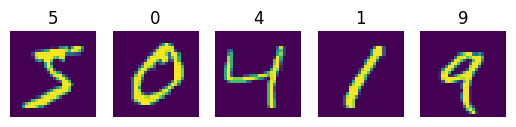

In [46]:
fig, ax = plt.subplots(1, 5)

for i in range(5):
    ax[i].imshow(X.iloc[i].to_numpy().reshape(28, 28))
    ax[i].set_title(Y[i])
    ax[i].axis('off')

plt.show()

По классике, разобьём датасет на две выборки, но в этот раз используем для обучения всего-лишь 10К записей, дабы ускорить процесс:

In [71]:
X_train, X_test, Y_train, Y_test = \
  sk.model_selection.train_test_split(X,Y,train_size=10000, test_size=10000)

Ранее рассматривалась только бинарная классификация, поэтому для многоклассовой классификации можно использовать подход `один против всех`. Начнём с задачи классиификации нуля:

In [69]:
Y0_train = Y_train == '0'
Y0_test = Y_test == '0'

model = sk.linear_model.LogisticRegression().fit(X_train, Y0_train)

sklearn.metrics.accuracy_score(Y0_test, model.predict(X_test))

d:\Slavik\Coding\PycharmProjects\AI_MAI\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9906

В сообщении выше сказано о том, что модель достигал максимального количества итераций, при которых ошибка не уменьшалась.

Для решения данной проблемы существует два варианта:

- Использование другого solver-а, который оптимизирует ошибку, например `lbfgs` это не градиентный спуск, это лишь один из методов нахождения минимума. Такие методы можно перебрать вручную и узнать, какой из них даёт наибольшую точность.
- Есть так же смысл провести нормирование серого цвета, который идёт от 0 до 255, привести его к диапазону от 0 до 1.

Нормируем признаки и посмотрим, что получится:

In [70]:
model = sk.linear_model.LogisticRegression(solver='newton-cg').fit(X_train/255.0, Y0_train)

sk.metrics.accuracy_score(Y0_test, model.predict(X_test/255.0))

0.9916

В примере выше, повысилась точность и пропала ошибка. 

Теперь, необходимо понять, как расширить эту модель на все цифры, не создавать же по одной модели на каждую цифру. `Sklearn` содержит `OneVsRestClassifier`, который позволяет преобразовать любой бинарный классификатор в мультиклассовый с подходом `Один против всех`.

In [72]:
import sklearn.multiclass

model = sklearn.multiclass.OneVsRestClassifier(
    sk.linear_model.LogisticRegression(solver='newton-cg')
)

model.fit(X_train/255.0, Y_train)
sk.metrics.accuracy_score(Y_test, model.predict(X_test/255.0))

0.8998

Взглянем на матрицу ошибок:

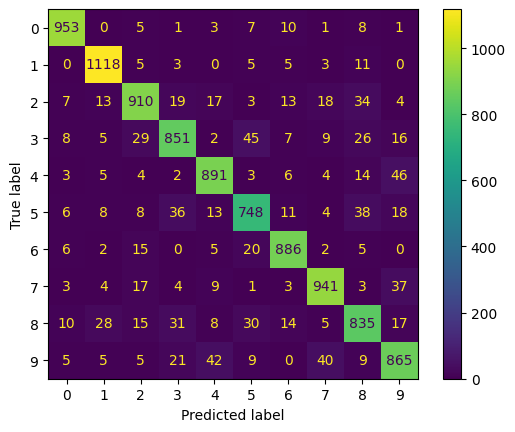

In [73]:
sk.metrics.ConfusionMatrixDisplay.from_estimator(model, X_test/255.0, Y_test)
plt.show()

`OneVsRestClassifier` может превратить любой бинарный классификатор в мультиклассовый, помимо него, в `Sklearn` многие классификаторы так же поддерживают мультиклассовый режим, проверим это на примере `LogisticRegression`:

In [77]:
model = sk.linear_model.LogisticRegression(solver='newton-cg')
model.fit(X_train/255.0, Y_train)

sk.metrics.accuracy_score(Y_test, model.predict(X_test / 255.0))

0.9005

В моделях регрессии всегда можно было вывести коэффиценты, интересно, как же теперь отобразятся коэффиценты в случае работы с матрицами:

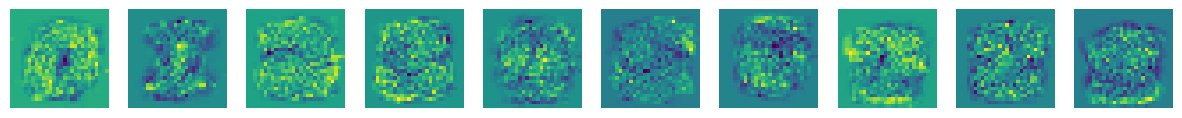

In [78]:
fig,ax = plt.subplots(1,10,figsize=(15,6))
for i in range(10):
    ax[i].imshow(model.coef_[i].reshape(28,28))
    ax[i].axis('off')
plt.show()

Выше изображены паттерны всех цифр и значимость точек в них. Этот паттерн с коэффицентами умножается на изображение и на выходе получается тот класс, чей паттерн лучше совпадает с картинкой.

Проблемой этого подхода является привязанность к местоположению цифры, то есть, если единичка полностью попадёт в паттерн нуля на одной из дуг, то эта цифра с большой вероятностью будет определена, как ноль

Для решения этих проблем в дальнейшем будут использоваться свёрточные нейронные сети.

# Кросс-валидация (K-Fold Cross Validation)

Ранее для подготовки модели, датасет делился на обучающую и тестовую выборку, тем самым появлялось 2 проблемы:

- Пропадает часть выборки (не используется в обучении)
- Вероятность плохого разделения выборки на тестовую и обучающую

Таким образом, от разделения во многом зависит итоговая точность модели. Чтобы избегать этого, используется кросс-валидация.

Кросс-валидация - принцип заключается в том, чтобы разделить выборку на n частей, после чего использовать 1 часть, как тестовую, а (n-1) как обучающую. Это будет одна модель, таких моделей надо обучить n штук, каждый раз меняя тестовую часть выборки. Получив n моделей, сравниваем их точность.

- Если точность всех моделей приблизительно равна, то это хорошее разделение выборки.
- Если точность разнится, то необходимо её усреднить.


Так же кросс валидация позволяет построить точность предсказания исходного датасета, взяв предсказания каждой модели по отдельности


На практике для этого используется модель `cross_val_score`:

In [ ]:
model = sk.linear_model.LogisticRegression(solver='newton-cg')

scores = sk.model_selection.cross_val_score(model, X/255.0, Y, cv=5)
scores

Различные стратегии разбиения выборки достигаются с помощью параметра `cv`.

Чтобы получить обученные модели во время кросс-валидации, используется `cross_validate`.

Существует так же метод `cross_val_predict`, возвращающий предсказания модели для каждого из элементов входного датасета, когда он был частью тестовой выборки (предсказание исходного датасета).

In [ ]:
scores.mean(), scores.std()

# Кластеризация

Все методы до этого использовали обучение с учителем (обучающей выборкой). Однако, в некоторых случаях можно обойтись без целевой функции, используя свойства самого датасета, это относят к методам обучения без учителя. Кластеризация относится к такому типу.



Вернёмся к датасету рукописных цифр `MNIST`:

In [1]:
import sklearn as sk
import sklearn.model_selection
from sklearn.datasets import fetch_openml

import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784')

X = mnist.data.to_numpy() / 255.0
Y = mnist.target.to_numpy().astype(np.uint8)

print(X.shape, Y.shape)

(70000, 784) (70000,)


Подумаем, как бы можно было написать классификатор рукописных цифр руками...

Если представить изображение цифры, как некоторый вектор длиной 784 и взять пространство размерности 784, то каждый рукописная цифра будет представлена в этом пространстве, как точка. Предположим, что одинаковые цифры в этом пространстве находятся довольно близко друг к другу.

С таким подходом, для пришедшей точки, будем искать минимальное расстояние до других точек. Класс точки с минимальным расстоянием - результирующий класс.

## KNN классификаторы

Выше был описан алгоритм k-ближайших соседей. Этот алгоритм используется, если на множестве данных существует некоторая метрика близости (расстояния). В случае рукописных цифр за метрику расстояния можно принять среднеквадратичную разность между яркостями всех пикселей изображения.

In [3]:
def dist(X, Y):
    return np.sum((X - Y) * (X - Y))

for _ in range(15):
    i,j = np.random.randint(0,len(X),size=2)
    print(f"Distance between {Y[i]} and {Y[j]} is {dist(X[i],X[j])}")

Distance between 8 and 5 is 133.79578623606307
Distance between 6 and 0 is 181.08935024990387
Distance between 3 and 2 is 111.16136870434448
Distance between 9 and 8 is 74.67675509419453
Distance between 0 and 5 is 96.5605382545175
Distance between 6 and 1 is 139.96739715494041
Distance between 9 and 1 is 130.2809073433295
Distance between 5 and 7 is 102.25808535178778
Distance between 2 and 5 is 113.64216839677049
Distance between 1 and 1 is 23.01811610918877
Distance between 6 and 7 is 121.25397923875434
Distance between 5 and 6 is 148.93239523260286
Distance between 6 and 1 is 118.29288735101883
Distance between 3 and 2 is 118.08339869281045
Distance between 1 and 2 is 94.91151095732413


Выше посчитаны расстояния между цифрами (метрика - квадрат разности пикселей), можно заметить, что у одинаковых цифр расстояние намного меньше.

Раз такая метрика даёт результат, то для классификации будем использовать следующий алгоритм:

1) Ищем изображение X, которое имеет минимальное расстояние до входного
2) В качестве ответа возвращаем класс этого изображения X

In [4]:
X_train, X_test, Y_train, Y_test = \
   sk.model_selection.train_test_split(X,Y,train_size=10000, test_size=2000,shuffle=True)

def classify(input_img):
    i = np.argmin([dist(x,input_img) for x in X_train])
    return Y_train[i]

n = 20
correct = 0
for x,y in zip(X_test[:n],Y_test[:n]):
    r = classify(x)
    print(f"{y} classified as {r}")
    correct += (y==r)
print(f"Accuracy: {correct/n}")

8 classified as 8
8 classified as 8
6 classified as 6
9 classified as 9
8 classified as 8
9 classified as 9
9 classified as 9
1 classified as 1
8 classified as 8
1 classified as 1
4 classified as 4
5 classified as 5
2 classified as 2
1 classified as 1
3 classified as 3
3 classified as 3
5 classified as 5
1 classified as 1
3 classified as 3
7 classified as 7
Accuracy: 1.0


Для нахождения минимального расстояния использовалась функция `numpy.argmin`, которая из множества решений находит индекс наименьшего.

Видно, что точность получена 1, поскольку каждый раз модель просматривает весь датасет с нуля, то есть она не обучается. Если запускать несколько раз, то можно заметить, что точность может падать. Правильно точность таких моделей посчитать довольно сложно. В данной ситуации был реализован KNN классификатор с K=1.

Для повышения точности следует использовать следующий алгоритм:

- Выбираем K ближайших по расстоянию цифр к входной цифре I
- Из этого множества ближайших возвращаем ту цифру, которая встречается наибольшее количество раз

При чём в качестве K чаще всего берут нечётное число.

![KNN-3](https://i.imgur.com/vLw0205.png)

KNN-классификатор также включен в `Sklearn`:

In [5]:
import sklearn.metrics
import sklearn.neighbors

res = []

for i in range(1, 10):
    model = sk.neighbors.KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, Y_train)

    acc = sk.metrics.accuracy_score(Y_test, model.predict(X_test))
    print(f"Accuracy for k={i} is {acc}")
    res.append(acc)

Accuracy for k=1 is 0.9435
Accuracy for k=2 is 0.9335
Accuracy for k=3 is 0.9485
Accuracy for k=4 is 0.9455
Accuracy for k=5 is 0.9505
Accuracy for k=6 is 0.945
Accuracy for k=7 is 0.9455
Accuracy for k=8 is 0.947
Accuracy for k=9 is 0.9455


Из теста выше видно, что K=5 даёт наилучшую точность вычисления.

Такой параметр k называется гиперпараметром модели (важно не путать с признаками входных данных).

А процесс выше называется оптимизацией гиперпараметров.